<a href="https://colab.research.google.com/github/Anatole-2202/greends-ipython/blob/main/Assignment_pandas_anatole.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignement n°3 : Pandas**
### Anatole LEVREL
####19 November 2025

Dataset : KIVA loans.


###Table of contents
1. Dataset
2. Question 1 : In which country and region is kiva used the most?
3. Question 2 : What are the amounts usually lent in average and does it differ from a sector to another, or from a country to another ?
4. Question 3 : What is the proportion of the totally/partially funded kiva projects ?
5. Question 4 : Which projects sector have the biggest differences between loan amounts and funded amounts?
6. Question 5 :  how many lenders finance a project in average and which projects have the most import contributions ?
7. Question 6 :
8. Conclusion

# 1. **Dataset**  
The first thing to do is to set pandas properly for its utilisation. It will be the main tool we will use to explore the dataset. We will use its function to read the data set and create a panda dataframe.
Kiva is a crowfunding platform created to finance projects leaded by people with small resources and it aim to empower the local economy, mainly in undevelopped countries. This dataset provide several informations about this platforms' users, their project, the amount of the loan/the fund and geographic and temporal informations.

In [ ]:
import pandas as pd
kiva = pd.read_csv("/content/drive/MyDrive/python isa/kiva_loans.csv")

# 2. **Question 1 : In which country and region is kiva used the most?**

In [ ]:
location = kiva[["country", "region"]]
location.describe()

,country,region
count,671205,614405
unique,87,12695
top,Philippines,Kaduna
freq,160441,10000


In [ ]:
kiva["country"].value_counts()

,count
country,
Philippines,160441
Kenya,75825
El Salvador,39875
Cambodia,34836
Pakistan,26857
...,...
Virgin Islands,2
Afghanistan,2
Mauritania,1


In [ ]:
kaduna = location[location["region"].isin(["Kaduna"])]
kaduna.describe()

,country,region
count,10000,10000
unique,1,1
top,Nigeria,Kaduna
freq,10000,10000


To answer this question, I have subset the dataframe `kiva`into a data frame `location`. I used the `.describe`function to see that there are 87 countries where kiva has been used, and the country where it is the most used is `philippines` with `16044` occurences in the dataset. The region where kiva is the most used is `Kaduna`. By creating a subset with only `Kaduna` region thanks to the string method `.isin` and doing a `describe`on it, we learn that it is a region in `Nigeria`.

# 3. **Question 2 : What are the amounts usually lent in average and does it differ from a sector to another, or from a country to another ?**

Currency issue : This dataset contain 20 variables. 6 of them are integer or floats (numeric) and 14 of them are objects (text/string). Several of these numeric variable are currency units which can change depending on the country we must ocnsider it, \to compare the differents amounts of money in the variables
`funded_amount`, `loan_amount`.



In [ ]:
import pandas as pd
import numpy as np

# Recent statics currency rates dictionary
current_rates_static = {
    'USD': 1.00000, 'EUR': 1.08000, 'CNY': 0.13800, 'INR': 0.01200, 'PKR': 0.00360,
    'KES': 0.00760, 'TZS': 0.00040, 'PHP': 0.01700, 'PEN': 0.26500, 'XOF': 0.00165,
    'VND': 0.000039, 'HNL': 0.04050, 'MNT': 0.00029, 'COP': 0.00025, 'GTQ': 0.12800,
    'TJS': 0.09100, 'BOB': 0.14400, 'KHR': 0.00024, 'GHS': 0.07300, 'HTG': 0.00750,
    'CLP': 0.00105, 'JOD': 1.41000, 'UGX': 0.00026, 'BIF': 0.00035, 'IDR': 0.000064,
    'GEL': 0.36000, 'UAH': 0.02600, 'ALL': 0.01050, 'CRC': 0.00185, 'XAF': 0.00165,
    'TRY': 0.03050, 'AZN': 0.58800, 'DOP': 0.01700, 'BRL': 0.19000, 'MXN': 0.05700,
    'KGS': 0.01130, 'AMD': 0.00250, 'PYG': 0.00013, 'LBP': 0.000067, 'WST': 0.36000,
    'ILS': 0.27000, 'RWF': 0.00078, 'ZMW': 0.03900, 'NPR': 0.00750, 'MZN': 0.01570,
    'ZAR': 0.05500, 'BZD': 0.49600, 'SRD': 0.03100, 'NGN': 0.00069, 'VUV': 0.00840,
    'XCD': 0.37000, 'MWK': 0.00057, 'LAK': 0.000046, 'MMK': 0.00048, 'MDL': 0.05600,
    'SBD': 0.11900, 'EGP': 0.02070, 'MGA': 0.00022, 'NAD': 0.05500, 'LSL': 0.05500,
    'THB': 0.02750,
    # rare currencies, left in NaN
    'LRD': np.nan, 'SLL': np.nan, 'ZWD': np.nan, 'SSP': np.nan
}

# Transformation from dictionary to panda series to create the new table for currencyrates
rates_series = pd.Series(current_rates_static)

# merging the rate to the data frame using .map()
kiva['current_rate_to_USD'] = kiva['currency'].map(rates_series)

# New columns computing
kiva['funded_amount_USD_CURRENT'] = kiva['funded_amount'] * kiva['current_rate_to_USD']
kiva['loan_amount_USD_CURRENT'] = kiva['loan_amount'] * kiva['current_rate_to_USD']

# Cleaning
kiva = kiva.drop(columns=['current_rate_to_USD'])

print("Conversion achieved. Non converted rows are now NaN.")

Conversion achieved. Non converted rows are now NaN.


In [ ]:
funded_sum_by_sector = kiva.groupby('sector')['funded_amount_USD_CURRENT'].sum()
funded_sum_by_sector = funded_sum_by_sector.sort_values(ascending=False)
funded_sum_by_sector.head(20)

,funded_amount_USD_CURRENT
sector,
Agriculture,3.413229e+07
Food,2.951736e+07
Retail,2.232533e+07
Services,1.715465e+07
Education,1.484067e+07
Clothing,1.189272e+07
Housing,7.558316e+06
Personal Use,4.837710e+06
Arts,4.669777e+06


The main sectors with the highest amount of funds are Agriculture, food, retail. Probably because these are essential sector to provide food, empower the local economy and give job to the local people.

# 4. **Question 3 : What is the proportion of the totally/partially funded kiva projects ?**

92.80 % of the projects have been totally funded, and 7.20 % have been partially funded.


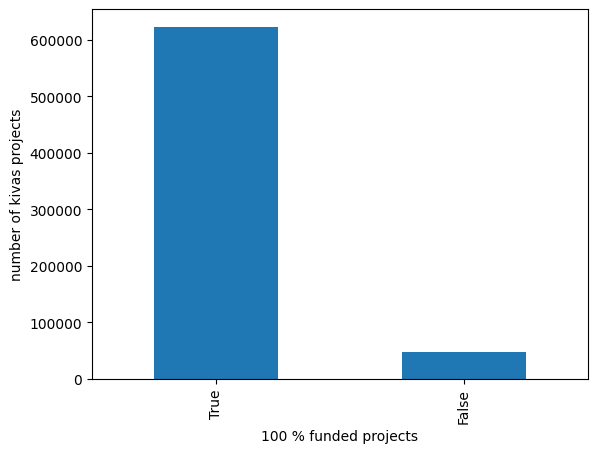

In [ ]:
kiva["is_funded_100pc"] = kiva.apply(lambda row: True if row["funded_amount"] == row['loan_amount'] else False, axis=1)
true_false_proportions = kiva["is_funded_100pc"].value_counts()
T=true_false_proportions[True]/true_false_proportions.sum()*100
F=true_false_proportions[False]/true_false_proportions.sum()*100
true_false_proportions.plot.bar(xlabel='100 % funded projects', ylabel='number of kivas projects')
print(f"{T:.2f} % of the projects have been totally funded, and {F:.2f} % have been partially funded.")

The huge majority of kiva's projects is totally funded, and only a small part 7,20 % is partially funded. In the next question we will see which sectors are the less 100% funded to try to explain why.

# 5. **Question 4 : Which projects sector have the biggest differences between loan amounts and funded amounts?**

In [ ]:
kiva["difference_loan_funded"] = kiva["loan_amount_USD_CURRENT"] - kiva["funded_amount_USD_CURRENT"]
kiva[["loan_amount_USD_CURRENT", "funded_amount_USD_CURRENT", "difference_loan_funded", "sector"]].groupby("sector").sum(

).sort_values("difference_loan_funded", ascending=False)

,loan_amount_USD_CURRENT,funded_amount_USD_CURRENT,difference_loan_funded
sector,,,
Services,2.094419e+07,1.715465e+07,3.789535e+06
Retail,2.542314e+07,2.232533e+07,3.097808e+06
Food,3.228249e+07,2.951736e+07,2.765133e+06
Agriculture,3.689130e+07,3.413229e+07,2.759009e+06
Clothing,1.309116e+07,1.189272e+07,1.198436e+06
Housing,8.577451e+06,7.558316e+06,1.019136e+06
Education,1.546437e+07,1.484067e+07,6.236966e+05
Transportation,3.595677e+06,3.033820e+06,5.618570e+05
Arts,5.042911e+06,4.669777e+06,3.731335e+05


We can see that the **biggest difference** between loan and funded amounts is in the `service` sector. As it is not an "absolutely essential" (it's not "vital") industry, it is less plebiscited by lenders. On the contrary, some other sectors like `manufacturing` or `health`, `wholesale` have some of the smallest differences between loan and funded amounts because they are seen as essential. It is because they have a "life-saving" dimension,`wholesale`, because it helps people to access food or other goods, and `manufacturing` because it helps to empower local economy and access to work. the life saving dimension of `health`is obvious as well.

# 6. **Question 5 : how many lenders finance a project in average and which projects have the most import contributions?**

In [ ]:
kiva["lender_count"].describe()

,lender_count
count,671205.000000
mean,20.590922
std,28.459551
min,0.000000
25%,7.000000
50%,13.000000
75%,24.000000
max,2986.000000


In [ ]:
kiva["average_contribution_USD"]=kiva["funded_amount_USD_CURRENT"]/kiva["lender_count"]
per_contributor=kiva[["funded_amount_USD_CURRENT", "lender_count", "average_contribution_USD"]].sort_values(
    "funded_amount_USD_CURRENT", ascending=False)
per_contributor_notna = per_contributor[per_contributor["funded_amount_USD_CURRENT"].notna()]
per_contributor_notzero = per_contributor_notna[per_contributor_notna["funded_amount_USD_CURRENT"]>0]
per_contributor_notzero

,funded_amount_USD_CURRENT,lender_count,average_contribution_USD
70499,100000.000000,2986,33.489618
631904,50000.000000,1706,29.308324
490191,50000.000000,1569,31.867431
614869,50000.000000,1094,45.703839
621860,50000.000000,1170,42.735043
...,...,...,...
659322,0.000975,1,0.000975
666773,0.000975,1,0.000975
657136,0.000975,1,0.000975
669489,0.000975,1,0.000975


In [ ]:
contribution_per_sector=kiva[["sector", "lender_count", "average_contribution_USD"]].groupby("sector").mean(

).sort_values("average_contribution_USD", ascending=False)

contribution_per_sector

,lender_count,average_contribution_USD
sector,,
Entertainment,31.762651,23.006622
Clothing,24.674852,21.228286
Education,29.335698,15.534878
Arts,27.055721,14.772916
Construction,27.656031,13.994761
Services,24.393642,13.517681
Food,19.863410,12.774075
Housing,19.266520,12.047248
Wholesale,43.413249,11.909711


The average lender number is `20.59`. A big amount of lenders generally means a big loan. But the biggest amount of lenders doesnt mean that the average contribtuion is the highest. Generally very small loans do only have 1 lender. Among the sectors with the highest average contribution, there are `clothing` and `entertainment` sectors. The sector with the smallest average amount per contribution is `personal use` because generally it is for one person or one family so the amounts asked are smaller than for a whole company or industry.

# 6. **Question 6 : Which are the most used means of repayment and for which range of amounts and which uses?**

<Axes: xlabel='repayment interval', ylabel='number of kivas projects'>

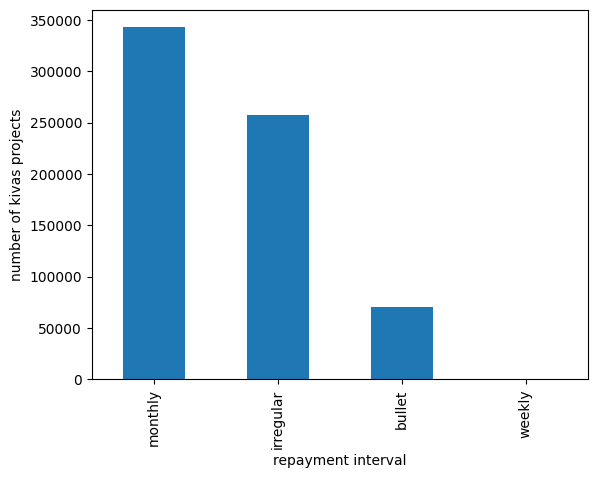

In [124]:
repayment_methods_proprtions = kiva["repayment_interval"].value_counts()
repayment_methods_proprtions.plot.bar(xlabel='repayment interval', ylabel='number of kivas projects')

In [137]:
repayment_per_funded_amount = kiva[["repayment_interval", "funded_amount_USD_CURRENT"]].groupby("repayment_interval").describe()
print(repayment_per_funded_amount)

                   funded_amount_USD_CURRENT                                \
                                       count        mean         std   min   
repayment_interval                                                           
bullet                               70535.0  158.790962  741.926184  0.00   
irregular                           248743.0  116.820557  803.841580  0.00   
monthly                             332701.0  355.299701  941.117892  0.00   
weekly                                 602.0    1.783538    0.851994  0.76   

                                                        
                        25%    50%      75%        max  
repayment_interval                                      
bullet              0.10625  2.100   20.475   50000.00  
irregular           2.12500  4.250    8.075  100000.00  
monthly             0.83000  5.250  350.000   50000.00  
weekly              0.95000  1.805    2.660       4.75  


In [133]:
repayment_per_sector = kiva[["repayment_interval", "sector",]].groupby("repayment_interval").value_counts()
print(repayment_per_sector)

repayment_interval  sector        
bullet              Agriculture       43963
                    Services           5083
                    Retail             4940
                    Personal Use       4791
                    Food               4607
                    Education          2437
                    Arts               1475
                    Clothing           1048
                    Housing             880
                    Manufacturing       451
                    Transportation      410
                    Construction        294
                    Entertainment       155
                    Health              138
                    Wholesale            56
irregular           Food              75914
                    Retail            73646
                    Agriculture       47524
                    Clothing          13559
                    Services          12552
                    Housing            8451
                    Transportation     64

The most common interval of repayment is `monthly` repayment, and the less used is `weekly`. `Weekly` interval of repayment is usually used for extremely small amounts and mostly in the `services` sector. `Monthly` interval of repayment is the most used, for the largest funded amounts and in `agriculture`/`foods` sectors.

# **Conclusion**

Kiva is used among 87 countries. The country where it is the most used is Philippines. But the region where it is the most used isnt in Philippines, it is Kaduna, Nigeria. The main sectors whith the highest funded amounts are agriculture, food and retail. We can see through theses sectors that kiva is mostly used to empower economy and promote resources access. 98,2% of the projects are totally funded, which means that the expected loan amount have been reached. The sectors with the less totally funded loan amounts are services and retails. The most totally funded are wholesale, manufacturing, and health, probably because of their "life-saving" and "economy empowering" dimensions. Several lenders can participate to a funding, in average they are 20,59. The project with the highest number of lenders has 2986 lenders and it raised 100 000 USD. Many projects have only one lender and generally the amounts of money lent are really low. The sectors with the highest contribution per lender are entertainement and clothing industries, and with the lowest contribution per lenders are agriculture and personal use. the most used repayment method is monthly repayment, corresponding generally with high amounts of loans and in agriculture sector. The less used is weekly repayment, corresponding with very small amounts and in services sector.